<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/AdaGrad_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adagrad [Adaptive Gradient]-**

While training, we keep changing the learning rate according to the situation.

Adagrad will work better when-

1)We have data having wide input feature range. WHich means , if you have data columns of cgpa and salary to predict column prediction.cgpa will be from range 0 to 10 and salary will be in range of 20000 to 60000 . Adagrad will work beter for this data. But still we can normalize this data such that mean will be 0 and standard deviation as 1 so there is not much applicaton of AdaGrad in this condition.

2)If we have features as sparse.Sparse means the data having most of the values as 0 or missing.Let we have input as cgpa , iq , from iit?, and output is package.So most of the values in from iit? column will be false which is represented by 0 for not from iit and 1 for from iit.SO such type of data is sparse data.If we have such sparse dataset then the optimizers like SGD , momentum SGD and Nesterov Accelerated Gradient Descent will not work properly.




**Why Adagrad works better on Sparse Dataset?**

Due to sparse column or sparse dataset,what happens is , when we update the weight using backpropogation algorithm,there might be many rows having 0 values.Due to these zero values , for many iterations , there will be no updation in weight and bias value.

The updation formula in backpropogation is as follows:

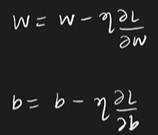



How we set different learninig rate is , if we have our parameter update is big then we set learning rate small so that when gradient is multiplied by small learning rate , the update should be small.So in a way we have to set learning rate small for those whose gradient is big.

**Disadvantage Of Adagrad-**

We dont use Adagrad in complex neural network architecture models.As we are keep changing the learning rate value by dividing it by previous gradients, adagrad is not able to converge to the optimum solution eaily.If we give higher epochs also, it wont reach to the optimum solution which is global minima.

**Now we will try to implement Adagrad Optimization algorithm on cifar10 dataset.**

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
#Loading the dataset
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
#Normalizing the pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
#We will apply one-hot-encoding
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [6]:
#Defining a neural network model
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
#Compiling the model
model.compile(optimizer = 'adagrad',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
#Training the model and storing history
history = model.fit(x_train,y_train_cat,epochs=10,batch_size=64,validation_data=(x_test,y_test_cat))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1776 - loss: 2.2188 - val_accuracy: 0.2696 - val_loss: 2.0230
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2832 - loss: 1.9985 - val_accuracy: 0.3169 - val_loss: 1.9242
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3156 - loss: 1.9128 - val_accuracy: 0.3290 - val_loss: 1.8762
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3377 - loss: 1.8660 - val_accuracy: 0.3535 - val_loss: 1.8401
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3505 - loss: 1.8328 - val_accuracy: 0.3551 - val_loss: 1.8231
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3596 - loss: 1.8076 - val_accuracy: 0.3666 - val_loss: 1.7933
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3694 - loss: 1.7872 - val_accuracy: 0.3742 - val_loss: 1.7737
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3716 - loss: 1.7727 - val_accuracy: 0.

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")
#This is the accuracy that we got

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3887 - loss: 1.7333
Test Accuracy: 0.3848


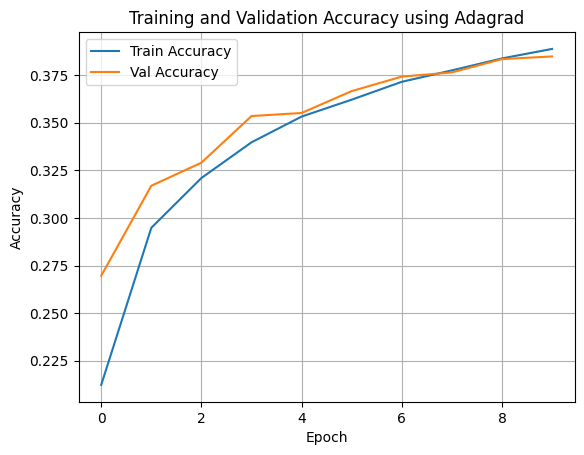

In [10]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy using Adagrad')
plt.legend()
plt.grid(True)
plt.show()